###Holly Figueroa
###DSC650 Week 5  

**Book Exercise 3.5**  
A Single-Label, Multiclass Classification of Newswires

In [ ]:
# Loading dataset
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

len(train_data)
len(test_data)

2246

In [ ]:
# How to decode newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_newswire= ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
# Encoding the data
# Encode the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
print( x_train.shape, x_test.shape)

(8982, 10000) (2246, 10000)


In [ ]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
# Model Definition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


In [ ]:
# Compileing the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting asside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 7s 249ms/step - loss: 2.8657 - accuracy: 0.4681 - val_loss: 1.9331 - val_accuracy: 0.6110
Epoch 2/20
16/16 [==============================] - 2s 127ms/step - loss: 1.6351 - accuracy: 0.6696 - val_loss: 1.4459 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 2s 123ms/step - loss: 1.2554 - accuracy: 0.7362 - val_loss: 1.2498 - val_accuracy: 0.7380
Epoch 4/20
16/16 [==============================] - 1s 69ms/step - loss: 1.0359 - accuracy: 0.7816 - val_loss: 1.1600 - val_accuracy: 0.7520
Epoch 5/20
16/16 [==============================] - 1s 75ms/step - loss: 0.8623 - accuracy: 0.8178 - val_loss: 1.0496 - val_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 2s 94ms/step - loss: 0.7235 - accuracy: 0.8433 - val_loss: 0.9968 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 2s 97ms/step - loss: 0.6088 - accuracy: 0.8721 - val_loss: 0.9654 - val_accuracy: 0.7900
Epoch 8/20

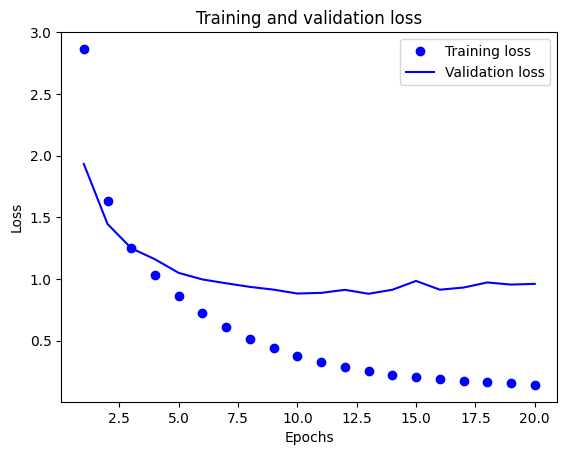

In [ ]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


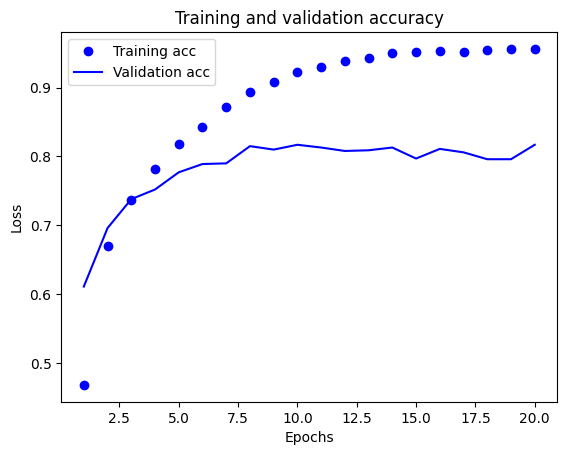

In [ ]:
# Plotting the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Retraining the model
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

# Compile
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Fit
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))
# Results
results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/9
16/16 [==============================] - 2s 74ms/step - loss: 2.6363 - accuracy: 0.5026 - val_loss: 1.7769 - val_accuracy: 0.6040
Epoch 2/9
16/16 [==============================] - 1s 56ms/step - loss: 1.5041 - accuracy: 0.6689 - val_loss: 1.3409 - val_accuracy: 0.7070
Epoch 3/9
16/16 [==============================] - 1s 52ms/step - loss: 1.1421 - accuracy: 0.7532 - val_loss: 1.1660 - val_accuracy: 0.7370
Epoch 4/9
16/16 [==============================] - 1s 56ms/step - loss: 0.9357 - accuracy: 0.7938 - val_loss: 1.0682 - val_accuracy: 0.7600
Epoch 5/9
16/16 [==============================] - 1s 64ms/step - loss: 0.7757 - accuracy: 0.8276 - val_loss: 0.9862 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 1s 64ms/step - loss: 0.6386 - accuracy: 0.8621 - val_loss: 0.9379 - val_accuracy: 0.7930
Epoch 7/9
16/16 [==============================] - 1s 62ms/step - loss: 0.5390 - accuracy: 0.8829 - val_loss: 0.9074 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

In [ ]:
# Generating predictions
predictions = model.predict(x_test)

# see predict is as vector with 46 len
predictions[0].shape

71/71 [==============================] - 0s 4ms/step


(46,)

In [ ]:
# see coefficients sum to one
np.sum(predictions[0])

1.0000001

In [ ]:
# see predicted class
np.argmax(predictions[0])

3

In [ ]:
# Experiment with dense layers
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

# Compile
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Fit
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=12,
                    batch_size=400,
                    validation_data=(x_val, y_val))

Epoch 1/12
20/20 [==============================] - 2s 69ms/step - loss: 2.6825 - accuracy: 0.5480 - val_loss: 1.8315 - val_accuracy: 0.6440
Epoch 2/12
20/20 [==============================] - 1s 51ms/step - loss: 1.5278 - accuracy: 0.6877 - val_loss: 1.3754 - val_accuracy: 0.7080
Epoch 3/12
20/20 [==============================] - 1s 49ms/step - loss: 1.1600 - accuracy: 0.7491 - val_loss: 1.2106 - val_accuracy: 0.7400
Epoch 4/12
20/20 [==============================] - 1s 51ms/step - loss: 0.9492 - accuracy: 0.7914 - val_loss: 1.1178 - val_accuracy: 0.7400
Epoch 5/12
20/20 [==============================] - 1s 49ms/step - loss: 0.7874 - accuracy: 0.8236 - val_loss: 1.0256 - val_accuracy: 0.7690
Epoch 6/12
20/20 [==============================] - 1s 50ms/step - loss: 0.6556 - accuracy: 0.8572 - val_loss: 0.9566 - val_accuracy: 0.7890
Epoch 7/12
20/20 [==============================] - 1s 45ms/step - loss: 0.5462 - accuracy: 0.8817 - val_loss: 0.9251 - val_accuracy: 0.7950
Epoch 8/12
20

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 0.9653 - accuracy: 0.7845


In [ ]:
#!jupyter nbconvert --to html /content/Assignment5_2.ipynb